In [1]:
import pandas as pd
import numpy as np

In [2]:
time = pd.read_csv("./data/Time.csv")
time["date"] = time.date.astype("datetime64[D]")
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


<AxesSubplot:xlabel='date'>

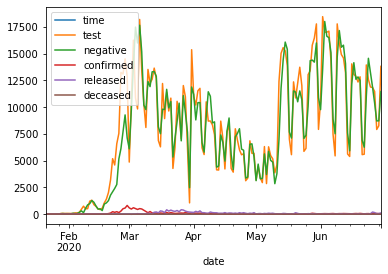

In [3]:
day_change = time.set_index("date")
day_change = (day_change - day_change.shift(1))[1:]
day_change.plot()

In [4]:
day_of_week_df = time.set_index("date")
day_of_week_df = (day_of_week_df - day_of_week_df.shift(1))[1:]
day_of_week_df = day_of_week_df.reset_index()
day_of_week_df = day_of_week_df.groupby(day_of_week_df['date'].dt.day_name()).mean().reset_index()

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_df['date'] = pd.Categorical(day_of_week_df['date'], categories=cats, ordered=True)
# day_of_week_df
day_of_week_df = day_of_week_df.sort_values(by="date").reset_index()

,date,test,confirmed,positive_ratio
0,Monday,4852.565217,67.217391,0.013852
1,Tuesday,9753.958333,63.375000,0.006497
2,Wednesday,8594.391304,76.130435,0.008858
3,Thursday,8632.000000,79.565217,0.009217
4,Friday,9373.869565,84.086957,0.008970
5,Saturday,8944.391304,104.347826,0.011666
6,Sunday,4805.826087,79.000000,0.016438


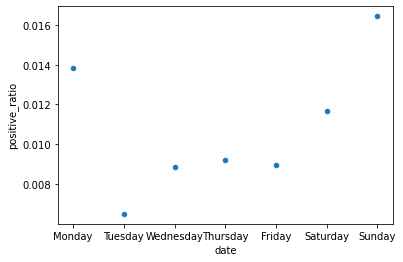

In [5]:
day_of_week_df = day_of_week_df[["date","test","confirmed"]]
day_of_week_df["positive_ratio"] = day_of_week_df.confirmed/day_of_week_df.test
day_of_week_df.plot.scatter(x="date",y="positive_ratio")
day_of_week_df

,date,test,confirmed,positive_ratio,positive_ratio_roll-1
0,Monday,4852.565217,63.375000,0.013852,0.013060
1,Tuesday,9753.958333,76.130435,0.006497,0.007805
2,Wednesday,8594.391304,79.565217,0.008858,0.009258
3,Thursday,8632.000000,84.086957,0.009217,0.009741
4,Friday,9373.869565,104.347826,0.008970,0.011132
5,Saturday,8944.391304,79.000000,0.011666,0.008832
6,Sunday,4805.826087,67.217391,0.016438,0.013987


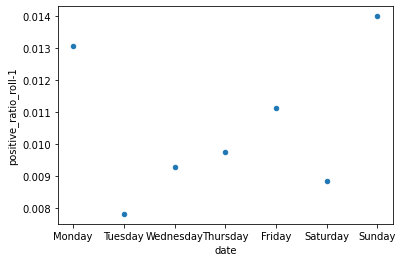

In [20]:
day_of_week_df['confirmed'] = np.roll(day_of_week_df['confirmed'],-1)
day_of_week_df["positive_ratio_roll-1"] = day_of_week_df.confirmed/day_of_week_df.test
day_of_week_df.plot.scatter(x="date",y="positive_ratio_roll-1")
day_of_week_df

Was hoping for numbers which are much closer so I can say that there's a 1 day delay in getting testing results, but it seems that weekends also end up delaying some results as wells.